In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from scipy.stats import linregress

# Import API keys
from api_keys import g_key
from api_keys import meteostat_api_key
from api_keys import open_cage_api_key

gmaps.configure(api_key=g_key)

In [2]:
#importing Yellow Cab Taxi Ride data from .csv
# PULocationID = Pickup Location ID
# DOLocationID = Drop-off Location ID

# Contains the info for every taxi cab ride in New York City in January 2019

taxi_data = pd.read_csv("../resources/taxi_data/combined_months.csv")

# Contains each official Taxi Pickup Zone in NYC 

pickup_zone_data = pd.read_csv("../resources/taxi_data/nyc_pickup_zones.csv")
pickup_zone_data = pickup_zone_data.rename(columns={'OBJECTID': 'PULocationID'})

# Neighborhood Data

with open("../resources/taxi_data/neighborhoods.json") as json_data:
    neighborhood_data = json.load(json_data)
    
neighborhood_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
# Setting up the Latitude and Longitude empty columns will pull these coordinates from Neighborhood Data
taxi_data['Latitude'] =""
taxi_data['Longitude'] =""

# Merging the 'taxi_data' and 'pickup_zone_data' on PULocationID (aka Zone ID)
# This is essentially grabbing the PULocationID from 'taxi_data' and finding it's name in 'pickup_zone_data'
merged_taxi_zones = pd.merge(taxi_data,pickup_zone_data, how='inner',on="PULocationID")



# Filtering the 'merged_taxi_zones' dataframe so it only include rides that happened in Manhattan
manhattan_taxi_zones = merged_taxi_zones[(merged_taxi_zones['borough']=='Manhattan')]


# counting the number of pickups in each pickup zone



#manhattan_taxi_zones.head(100)

# manhattan_taxi_zones['tpep_pickup_datetime'] = pd.to_datetime(manhattan_taxi_zones['tpep_pickup_datetime'])

manhattan_taxi_zones.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(manhattan_taxi_zones['tpep_pickup_datetime']).dt.date

manhattan_taxi_zones.sort_values(by='tpep_pickup_datetime', ascending=False)


manhattan_taxi_zones

C:\Users\Mark\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


ca  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0          6664.0       1.0           2019-01-01         1/1/2019 0:35   
1         10283.0       2.0           2019-01-01         1/1/2019 1:11   
2         24495.0       1.0           2019-01-01         1/1/2019 1:19   
3         15829.0       2.0           2019-01-01         1/1/2019 1:42   
4         22484.0       1.0           2019-01-01         1/1/2019 2:04   
...           ...       ...                  ...                   ...   
593198  2659228.0       2.0           2019-05-11       5/11/2019 10:37   
593199  2547957.0       2.0           2019-06-11       6/11/2019 23:47   
593200  5277542.0       2.0           2019-06-23       6/23/2019 16:54   
593201  6350280.0       1.0           2019-06-28        6/28/2019 7:29   
593229  2050738.0       1.0           2019-04-09         4/9/2019 6:16   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           5.60         1.0                  N   
1                   1.0           1.65         1.0                  N   
2                   1.0           1.10         1.0                  N   
3                   1.0           1.77         1.0                  N   
4                   3.0           2.70         1.0                  N   
...                 ...            ...         ...                ...   
593198              1.0           2.67         1.0                  N   
593199              1.0           0.85         1.0                  N   
593200              1.0           0.69         1.0                  N   
593201              0.0           6.70         1.0                  N   
593229              1.0           5.50         1.0                  N   

        PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0              158.0         236.0  ...        0.00           0.0   
1              158.0         148.0  ...        2.16           0.0   
2              158.0         186.0  ...        1.45           0.0   
3              158.0         186.0  ...        0.00           0.0   
4              158.0          87.0  ...        2.65           0.0   
...              ...           ...  ...         ...           ...   
593198         153.0          20.0  ...        0.00           0.0   
593199         153.0         127.0  ...        0.00           0.0   
593200         153.0         127.0  ...        1.06           0.0   
593201         153.0          41.0  ...        0.00           0.0   
593229         105.0         229.0  ...        2.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  Latitude  \
0                         0.3         24.80                   NaN             
1                         0.3         12.96                   NaN             
2                         0.3          8.75                   NaN             
3                         0.3          9.30                   NaN             
4                         0.3         15.95                   NaN             
...                       ...           ...                   ...       ...   
593198                    0.3         11.30                   0.0             
593199                    0.3          6.30                   0.0             
593200                    0.3          6.36                   0.0             
593201                    0.3         23.80                   0.0             
593229                    0.3         22.80                   2.5             

        Longitude  Shape_Leng                                           zone  \
0                    0.054810                  Meatpacking/West Village West   
1                    0.054810                  Meatpacking/West Village West   
2                    0.054810                  Meatpacking/West Village West   
3                    0.054810                  Meatpacking/West Village West   
4                    0.054810                  Meatpacking/West Village

In [ ]:
#neighborhood_data['features'][0]['geometry']['coordinates']


# Returns neighborhood

manhattan_taxi_zones.set_index("zone",inplace = True)

manhattan_taxi_zones

coords_list = []


for index, column in manhattan_taxi_zones.iterrows():
    neighbohood_name = neighborhood_data['features'][0]['properties']['name']
    coords = neighborhood_data['features'][0]['geometry']['coordinates']
    
    try:
        coords_list.append(neighbohood_name)
        print(f"Coords: {neighbohood_name}")
    except:
        coords_list.append("Not found, try changing name")
    continue

coords_list
    


Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wakefield
Coords: Wa

# Ride Volume By Day #

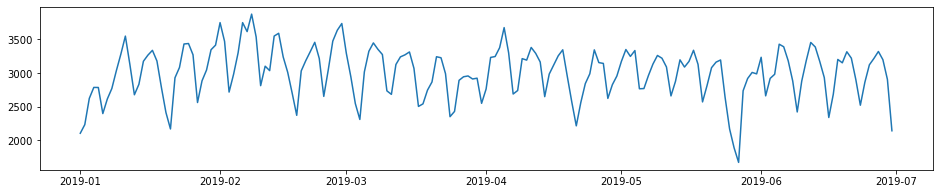

In [9]:
ride_volume_per_day = manhattan_taxi_zones["tpep_pickup_datetime"].value_counts()

plt.figure(figsize=(16,3))
ride_volume_per_day.plot.line()



# Ride Volume By Neighborhood #


Text(0, 0.5, 'Neighbhorhood')

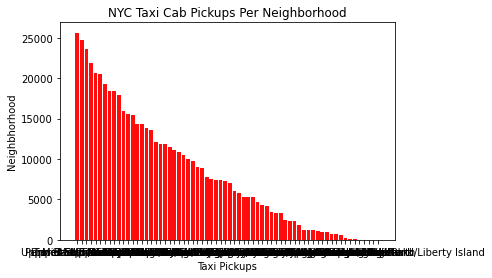

In [12]:
zone_count = manhattan_taxi_zones['zone'].value_counts()
neighborhood_count = pd.DataFrame(zone_count).reset_index()
neighborhood_count.columns = ['Neighborhood','Rides']

neighborhood_count

zone_count


x_axis = neighborhood_count['Neighborhood']
y_axis = neighborhood_count['Rides']


neighborhood_count
count_status = pd.value_counts(manhattan_taxi_zones['zone'])
plt.bar(x_axis, y_axis, facecolor="red", alpha=0.95, align="center")
plt.title("NYC Taxi Cab Pickups Per Neighborhood")
plt.xlabel("Taxi Pickups")
plt.ylabel("Neighbhorhood")

